In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics

# LogisticRegression feature selection

In [2]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split( cancer.data, cancer.target, stratify=cancer.target, random_state=42)
print(X_train.shape)

(426, 30)


# Zad

Wykonaj algorytm LogisticRegression z 

* C = 1


In [3]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression().fit(X_train, y_train)

print("Training set score: {:.3f}".format(logreg.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg.score(X_test, y_test)))

Training set score: 0.955
Test set score: 0.958


* Domyślna wartość C = 1 zapewnia całkiem dobrą wydajność 95% dokładnością zarówno na treningu jak i na teście. 

* Ale ponieważ trening i wydajność zestawu testów są bardzo bliskie to pewnie da się uzyskać leprzy wynik. 

* Spróbujmy zwiększyć C, aby dopasować bardziej elastyczny model:

# Zad

Wykonaj algorytm LogisticRegression z 

* C = 100


In [4]:
logreg100 = LogisticRegression(C=100).fit(X_train, y_train)

print("Training set score: {:.3f}".format(logreg100.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg100.score(X_test, y_test)))

Training set score: 0.972
Test set score: 0.965


* Używanie C = 100 dostajemy wyższą dokładność na treningu, a także nieznacznie zwiększoną dokładność na teście potwierdzając naszą intuicję, że bardziej złożony model powinien działać lepiej. 

* Możemy również zbadać, co się stanie, jeśli użyjemy jeszcze bardziej uporządkowanego modelu niż domyślny C = 1, ustawiając C = 0.01:

# Zad

Wykonaj algorytm LogisticRegression z 

* C = 0.01


In [5]:
logreg001 = LogisticRegression(C=0.01).fit(X_train, y_train)

print("Training set score: {:.3f}".format(logreg001.score(X_train, y_train)))

print("Test set score: {:.3f}".format(logreg001.score(X_test, y_test)))

Training set score: 0.934
Test set score: 0.930


# Zad

Na koniec spójrzmy na współrzędne wykorzystywane przez modele z trzema różnymi ustawieniami parametru regularyzacji C

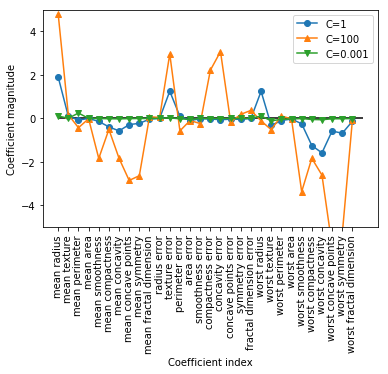

In [6]:
plt.plot(logreg.coef_.T, 'o-', label="C=1")
plt.plot(logreg100.coef_.T, '^-', label="C=100")
plt.plot(logreg001.coef_.T, 'v-', label="C=0.001")
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.hlines(0, 0, cancer.data.shape[1])
plt.ylim(-5, 5)
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.legend()
plt.show()

* Ponieważ LogisticRegression domyślnie stosuje regularyzację L2, wynik wygląda podobnie do tego uzyskanego przez Ridge. 

* Silniejsza regularyzacja przesuwa współczynniki coraz bardziej w kierunku zera, chociaż współczynniki nigdy nie stają się dokładnie zerowe. 

* Sprawdzając dokładniej wykres, możemy również zobaczyć interesujący efekt w trzecim współczynniku dla "mean perimeter". 

* Dla C = 100 i C = 1 współczynnik jest ujemny, natomiast dla C = 0,001 współczynnik jest dodatni, z wielkość, która jest nawet większa niż dla C = 1. 

* Interpretując taki model, można by sądzić, że współczynnik mówi nam, z którą klasą jest związana współrzędne. 

* Jednak zmiana znaku w współczynniku "mean perimeter" oznacza, że w zależności od tego, na który model patrzymy, wysoki "mean perimeter" może być uznany za klasę 0 lub 1 (Czyli nie daje żdnej informacji).

* Jeśli chcemy mieć bardziej interpretowalny model, może pomóc regulacja L1, ponieważ ogranicza on model do korzystania tylko z kilku współrzędnych. 

* Oto wykres współczynników i dokładności klasyfikacji dla regulacji L1:

# Zad

Narysuj wykre współrzędnych wykorzystywane przez modele z trzema różnymi ustawieniami parametru regularyzacji C i regularyzacją L1.